In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('whitegrid')
palette = 'Dark2_r'

In [3]:
## path for regression results

ar = pd.read_csv('../out/res_2021.csv', index_col=0)

In [4]:
ar

_city     _days        _location  _nearest _dependent_variable  \
0   amsterdam  weekdays  attr_index_norm        10         log_realSum   
1   amsterdam  weekdays  attr_index_norm        10         log_realSum   
2   amsterdam  weekdays  attr_index_norm        10         log_realSum   
3   amsterdam  weekdays  attr_index_norm        10         log_realSum   
4   amsterdam  weekdays  rest_index_norm        10         log_realSum   
..        ...       ...              ...       ...                 ...   
3      vienna  weekends  attr_index_norm        10         log_realSum   
4      vienna  weekends  rest_index_norm        10         log_realSum   
5      vienna  weekends  rest_index_norm        10         log_realSum   
6      vienna  weekends  rest_index_norm        10         log_realSum   
7      vienna  weekends  rest_index_norm        10         log_realSum   

          type    diag_aic  diag_loglik  coef_CONSTANT  coef_room_shared  ...  \
0          OLS  498.355107  -236.177553       5.218866         -0.607897  ...   
1     lagged_x  511.654762  -233.827381       5.533784         -0.614610  ...   
2     lagged_y  491.649068  -231.824534       4.423810         -0.597429  ...   
3   lagged_x_y  495.640844  -224.820422       4.153357         -0.608317  ...   
4          OLS  500.479575  -237.239788       5.185444         -0.611795  ...   
..         ...         ...          ...            ...               ...  ...   
3   lagged_x_y  807.371642  -380.685821       2.029531         -0.610182  ...   
4          OLS  884.790286  -429.395143       4.349429         -0.623031  ...   
5     lagged_x  858.216252  -407.108126       3.021445         -0.606134  ...   
6     lagged_y  835.973175  -403.986587       2.913498         -0.610699  ...   
7   lagged_x_y  809.650855  -381.825427       1.915597         -0.609616  ...   

    direct_cleanliness_rating  indirect_cleanliness_rating  \
0                    0.009462                     0.000000   
1                    0.010184                     0.007777   
2                    0.011201                     0.001573   
3                    0.008260                     0.001536   
4                    0.005453                     0.000000   
..                        ...                          ...   
3                    0.049137                     0.084650   
4                    0.052125                     0.000000   
5                    0.050054                     0.075076   
6                    0.048395                     0.016467   
7                    0.049399                     0.090469   

    direct_guest_satisfaction_overall  indirect_guest_satisfaction_overall  \
0                            0.004653                             0.000000   
1                            0.004700                            -0.003642   
2                            0.004510                             0.000634   
3                            0.004835                            -0.002694   
4                            0.005086                             0.000000   
..                                ...                                  ...   
3                            0.002168                             0.005664   
4                            0.002692                             0.000000   
5                            0.002257                             0.006201   
6                            0.002440                             0.000830   
7                            0.002188                             0.006197   

    direct_bedrooms  indirect_bedrooms  direct_dist  indirect_dist  \
0          0.119502           0.000000    -0.049380       0.000000   
1          0.119624          -0.038896    -0.046843       0.000000   
2          0.120935           0.016987    -0.039998      -0.005618   
3          0.121686          -0.044419    -0.035292      -0.011547   
4          0.124311           0.000000    -0.045306       0.000000   
..              ...                ...      

In [6]:
ar.columns

Index(['_city', '_days', '_location', '_nearest', '_dependent_variable',
       'type', 'diag_aic', 'diag_loglik', 'coef_CONSTANT', 'coef_room_shared',
       ...
       'direct_cleanliness_rating', 'indirect_cleanliness_rating',
       'direct_guest_satisfaction_overall',
       'indirect_guest_satisfaction_overall', 'direct_bedrooms',
       'indirect_bedrooms', 'direct_dist', 'indirect_dist',
       'direct_metro_dist', 'indirect_metro_dist'],
      dtype='object', length=106)

In [8]:
chosen = ar.loc[(ar['_dependent_variable'] == 'log_realSum') & (ar['_nearest'] == 10) & (ar['_days'] == 'weekdays')& (ar['_location'] == 'attr_index_norm')]

In [9]:
chosen=chosen.drop_duplicates(subset=['_city', 'type'], keep='first')

In [10]:
def type_order(row):
    if row['type']=='OLS':
        return 1
    elif row['type']=='lagged_e':
        return 2
    elif row['type']=='lagged_x':
        return 3
    elif row['type']=='lagged_y':
        return 4
    elif row['type']=='lagged_e_x':
        return 5
    elif row['type']=='lagged_e_y':
        return 6
    elif row['type']=='lagged_x_y':
        return 7
    elif row['type']=='lagged_e_x_y':
        return 8
    else:
        pass
chosen['type_order']=chosen.apply(lambda row: type_order(row), axis=1)
chosen=chosen.sort_values(by=['_city', 'type_order'])

In [11]:
def type_new(row):
    if row['type']=='OLS':
        return 'OLS'
    elif row['type']=='lagged_e':
        return 'WU'
    elif row['type']=='lagged_x':
        return 'WX'
    elif row['type']=='lagged_y':
        return 'WY'
    elif row['type']=='lagged_e_x':
        return 'WU,WX'
    elif row['type']=='lagged_e_y':
        return 'WU,WY'
    elif row['type']=='lagged_x_y':
        return 'WX,WY'
    elif row['type']=='lagged_e_x_y':
        return 'WU,WX,WY'
    else:
        pass
chosen['type_new']=chosen.apply(lambda row: type_new(row), axis=1)

In [12]:
all_models = chosen['type_new'].unique().tolist()
print('all_models', all_models)

chosen['_city'] = chosen['_city'].str.capitalize()
cities_names = chosen['_city'].unique().tolist()
print('cities_names', cities_names)

all_models ['OLS', 'WX', 'WY', 'WX,WY']
cities_names ['Amsterdam', 'Athens', 'Barcelona', 'Berlin', 'Budapest', 'Lisbon', 'London', 'Paris', 'Rome', 'Vienna']


In [13]:
#['#0093ED', '#6F798D', '#FF002D', '#56203D', '#F4DBD8'
colors = dict(zip(chosen['type_new'].unique(),
   ['#35A4A4','#c24a65', '#f7a600', '#4c90cd', '#f0de50', '#894c98', '#F56D45', '#8a514f']))

In [17]:
chosen.columns

Index(['_city', '_days', '_location', '_nearest', '_dependent_variable',
       'type', 'diag_aic', 'diag_loglik', 'coef_CONSTANT', 'coef_room_shared',
       ...
       'direct_guest_satisfaction_overall',
       'indirect_guest_satisfaction_overall', 'direct_bedrooms',
       'indirect_bedrooms', 'direct_dist', 'indirect_dist',
       'direct_metro_dist', 'indirect_metro_dist', 'type_order', 'type_new'],
      dtype='object', length=108)

In [19]:
colors

{'OLS': '#35A4A4', 'WX': '#c24a65', 'WY': '#f7a600', 'WX,WY': '#4c90cd'}

In [20]:
print([x for x in chosen.columns if x.startswith('direct_')])

['direct_attr_index_norm', 'direct_rest_index_norm', 'direct_room_shared', 'direct_room_private', 'direct_person_capacity', 'direct_host_is_superhost', 'direct_multi', 'direct_biz', 'direct_cleanliness_rating', 'direct_guest_satisfaction_overall', 'direct_bedrooms', 'direct_dist', 'direct_metro_dist']


In [21]:
all_variables= [
    #(['lag_cleanliness_rating', 'lag_biz'], None, ['lagged_x', 'lagged_x_y', 'lagged_e_x', 'lagged_e_x_y']),
    #(['metro_dist'], cities_names[:len(cities_names)//2], None),
    #(['metro_dist'], cities_names, ['lagged_y', 'lagged_e_y', 'lagged_x_y', 'lagged_e_x_y']),
    #(['metro_dist'], cities_names, None),
    #(['room_shared', 'room_private', 'person_capacity', 'bedrooms'], None, None),
    (['host_is_superhost'], None, None),
]

['host_is_superhost'] 1 ['Amsterdam', 'Athens', 'Barcelona', 'Berlin', 'Budapest', 'Lisbon', 'London', 'Paris', 'Rome', 'Vienna'] ['OLS', 'WX', 'WY', 'WX,WY']
-0.040844610244108015 0.08935123357727906 -0.040844610244108015 0.08935123357727906


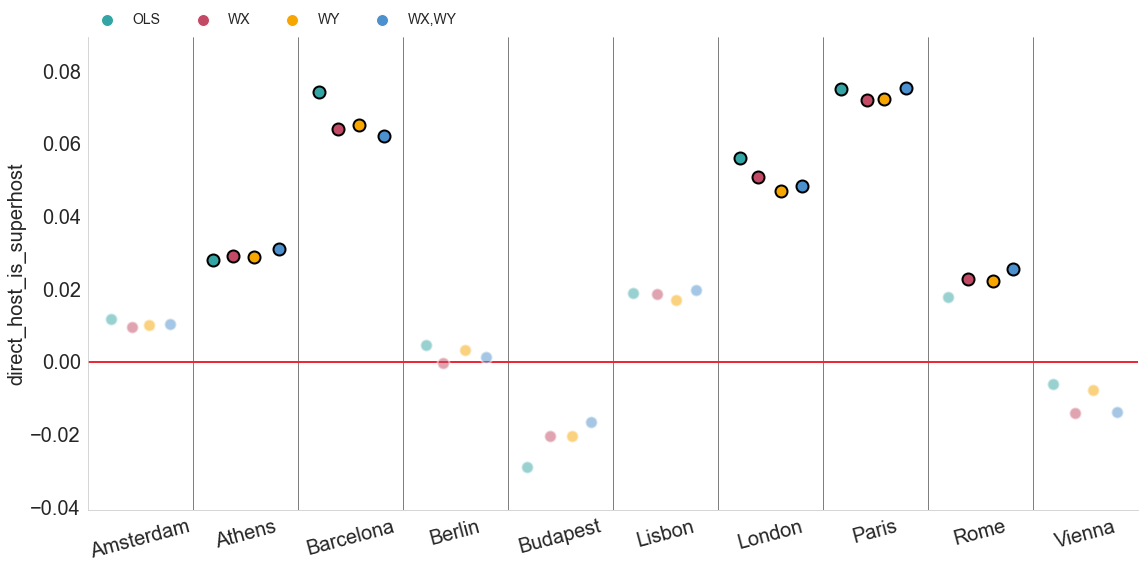

In [26]:
for variables, cities, models in all_variables:
    if cities is None:
        cities = cities_names
    if models is None:
        models = all_models
    print(variables,len(variables), cities, models)
    
    fig, ax = plt.subplots(nrows=len(variables), ncols=1, figsize=(16, 6*len(variables) if len(variables) > 1 else 8))
    chosen_sh = chosen.loc[(chosen['_city'].isin(cities)) & (chosen['type_new'].isin(models))]
    for ax_counter, variable in enumerate(variables):
        axc = ax[ax_counter] if len(variables) > 1 else ax  # if only one ax (one variable), counting impossible
        sns.stripplot(x='_city', y='direct_{}'.format(variable), hue='type_new',
                      data=chosen_sh.dropna(subset=['direct_{}'.format(variable)]),
                      ax=axc, size=12, dodge=True,
                      linewidth=2, edgecolor='black', palette=palette)
        sns.despine()
        counter = 0

        axc.get_yaxis().set_tick_params(labelsize=20)
        axc.get_yaxis().label.set_size(20)
        axc.get_xaxis().label.set_text('')  # city names are self-explanatory

        axc.yaxis.grid(False)
        for i in range(len(chosen_sh['_city'].unique()) - 1):
            axc.axvline(i + 0.5, 0, 1, color='black', lw=0.5)  # city separators
        axc.axhline(0, 0, 1, color='#ED2939', lw=2)  # red line at 0

        min_var = chosen_sh['direct_{}'.format(variable)].dropna().min()
        max_var = chosen_sh['direct_{}'.format(variable)].dropna().max()
        min_limit = (-1)*max_var / 10 + 1.15*min_var
        max_limit = (-1)*min_var / 10 + 1.15*max_var
        print(min_limit, max_limit, (-1)*max_limit / 20 if min_limit > (-1)*max_limit / 20 else min_limit,
                                (-1)*min_limit / 20 if max_limit < (-1)*min_limit / 20 else max_limit)
        axc.set_ylim((-1)*max_limit / 20 if min_limit > (-1)*max_limit / 20 else min_limit,
                                (-1)*min_limit / 20 if max_limit < (-1)*min_limit / 20 else max_limit)

        for counter_x, x in enumerate(axc.get_children()):
            if chosen_sh.shape[0] == counter_x:
                break
            x.set_facecolor(colors[chosen_sh.iloc[counter_x]['type_new']])
#             x.set_sizes([int(72 + 2*144*(
#                 (chosen_sh.iloc[counter_x]['std_err_{}'.format(variable)] - chosen['std_err_{}'.format(variable)].dropna().min()) / (
#                     chosen['std_err_{}'.format(variable)].dropna().max() - chosen['std_err_{}'.format(variable)].dropna().min())))])
            if chosen_sh.iloc[counter_x]['p_value_{}'.format(variable)] > 0.05:
                x.set_alpha(0.5)
                x.set_edgecolor('white')
                
        new_handles = []
        handles, labels = axc.get_legend_handles_labels()
        for handle, label in zip(handles, labels):
            handle.set_facecolor(colors[label])
            handle.set_edgecolor('white')
            handle.set_sizes([144])
            new_handles.append(handle)
        plt.legend(new_handles, labels)
        
        # one legend for two charts
        if ax_counter % 2 == 0:
            axc.legend(loc='lower left', bbox_to_anchor= (0.0, 1.01), ncol=4,
                         borderaxespad=0, frameon=False, fontsize=14)
            axc.get_xaxis().set_tick_params(labelsize=20, rotation=15)
        else:
            axc.get_legend().remove()
            axc.get_xaxis().set_visible(False)

        ax_counter += 1
        
    
    plt.tight_layout()
    #plt.savefig('dist_attr.pdf')